# Practice plots with December 2016 MCS case!

### Jeremiah Otero Piersante

In [12]:
pwd # You can use commands like pwd as if you are typing into the command line.


u'/glade2/work/jpiers/DEC16_notebooks'

In [2]:
# Import Python packages that will come in handy...

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import xarray as xr
import sys, os
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

#import scipy #NONE OF THESE WORKING
#import atmos
#import pyart

from matplotlib.cm import get_cmap
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.font_manager import FontProperties
from datetime import datetime, timedelta
from pandas import Timestamp
from netCDF4 import Dataset
from wrf import getvar, interplevel, to_np, smooth2d, get_basemap, latlon_coords, extract_times, ALL_TIMES
from glob import glob
from IPython.display import Image

#from PIL import Image
#from scipy.spatial import cKDTree # NOT WORKING!!
#from pyart.graph import cm
#from metpy.plots import ctables

%matplotlib inline

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
path = "/glade2/work/jpiers/WRFV3/run/" # set path to where WRF output files are located
wrf_files = sorted(glob(path+"wrfout_d01*")) # define wrf_files, sorted by time

len(wrf_files)
#print(wrf_files) # if we print it, we see them all listed with their paths

61

In [4]:
ds_12 = xr.open_dataset(wrf_files[12]) # create dataset variable for arbitrary entry in wrf_files using indexa

In [7]:
#sorted(glob(path+"wrfout*")) # here's another way we can see all the wrfout files in order


In [17]:
ds_12.variables

Frozen(OrderedDict([(u'Times', <xarray.Variable (Time: 1)>
array(['2016-12-25_12:00:00'],
      dtype='|S19')), (u'XLAT', <xarray.Variable (Time: 1, south_north: 599, west_east: 747)>
[447453 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      ), (u'XLONG', <xarray.Variable (Time: 1, south_north: 599, west_east: 747)>
[447453 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:      ), (u'LU_INDEX', <xarray.Variable (Time: 1, south_north: 599, west_east: 747)>
[447453 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      ), (u'ZNU', <xarray.Variable (Time: 1, bottom_top: 50)>
array([[ 0.996905,  0.99012 ,  0.982145,  0.973005,  0.96273 ,  0.9513

In [7]:
ds_12["T2"]

<xarray.DataArray 'T2' (Time: 1, south_north: 599, west_east: 747)>
[447453 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -41.6059 -41.6117 ...
    XLONG    (Time, south_north, west_east) float32 -83.0163 -82.9695 ...
    XTIME    (Time) datetime64[ns] 2016-12-25T12:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      

In [21]:
# see things that you'll need for Basemap

#for k, v in ds_12.attrs.items():
 #   print(k, v)

In [54]:
print(sys.argv[1])

-f


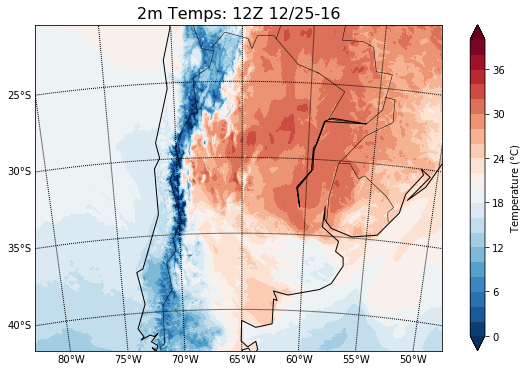

In [9]:
# create a figure: 2m temp

fig = plt.figure(figsize=(10, 6)) # define fig to set the size

bmap = Basemap(projection="lcc", lon_0=-65.25, lat_0=-32.0, lat_1=-32, lat_2=-32, 
               llcrnrlon=ds_12["XLONG"][0, 0, 0], llcrnrlat=ds_12["XLAT"][0, 0, 0], 
               urcrnrlon=ds_12["XLONG"][0, -1, -1], urcrnrlat=ds_12["XLAT"][0, -1, -1]) # This won't change much

x, y = bmap(ds_12["XLONG"][0].values, ds_12["XLAT"][0].values)

# add important lines
bmap.drawcoastlines()
bmap.drawcountries()

meridians = np.arange(-80, -30, 5)
parallels = np.arange(-40, -20, 5)
bmap.drawmeridians(meridians, labels=[0,0,0,1])
bmap.drawparallels(parallels, labels=[1,0,0,0])

# plot using contour fill
temp_contours = np.arange(0, 42, 2) # set contour range
plt.contourf(x, y, ds_12["T2"][0]-273.15, temp_contours, extend="both",
             cmap="RdBu_r")

# add title, labels, colorbar
plt.colorbar(label="Temperature ($\degree$C)")
# plt.xlabel("Longitude") # only if necessary
# plt.ylabel("Latitude") # only if necessary
plt.title("2m Temps: 12Z 12/25-16", fontsize=16)

# save figure - default is in same directory as notebook - see pwd above
plt.savefig("temp_2m_12-25_12z.png", bbox_inches="tight", dpi=200)

In [10]:
#Image("temp_2m_12-25_12z.png") # see the finished image

In [11]:
ls

temp_2m_12-25_12z.png  WRF_Plots_interp.ipynb  WRF_Plots_simple_contourf.ipynb


In [21]:
ds_12["SLP"]

KeyError: 'SLP'

TypeError: Input z must be a 2D array.

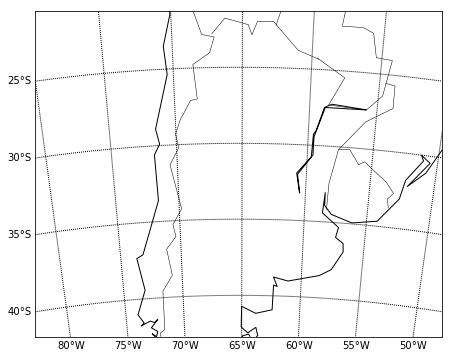

In [16]:
# repeat above for U wind - don't need the basemap stuff

fig = plt.figure(figsize=(10, 6)) # define fig to set the size

bmap = Basemap(projection="lcc", lon_0=-65.25, lat_0=-32.0, lat_1=-32, lat_2=-32, 
               llcrnrlon=ds_12["XLONG"][0, 0, 0], llcrnrlat=ds_12["XLAT"][0, 0, 0], 
               urcrnrlon=ds_12["XLONG"][0, -1, -1], urcrnrlat=ds_12["XLAT"][0, -1, -1]) # This won't change much

x, y = bmap(ds_12["XLONG"][0].values, ds_12["XLAT"][0].values)

# add important lines
bmap.drawcoastlines()
bmap.drawcountries()

meridians = np.arange(-80, -30, 5)
parallels = np.arange(-40, -20, 5)
bmap.drawmeridians(meridians, labels=[0,0,0,1])
bmap.drawparallels(parallels, labels=[1,0,0,0])

u_contours = np.arange(0, 42, 2) # set contour range
plt.contourf(x[0], y[0], ds_12["U"][0][0], u_contours, extend="both",
             cmap="RdBu_r") # needed to add another '[0]' after ds_12 because of dimensions

# add title, labels, colorbar
plt.colorbar(label="Wind Speed (m/s)")
# plt.xlabel("Longitude") # only if necessary
# plt.ylabel("Latitude") # only if necessary
plt.title("U Winds: 12Z 12/25-16", fontsize=16)

# save figure - default is in same directory as notebook - see pwd above
plt.savefig("Uwind_12-25_12z.png", bbox_inches="tight", dpi=200)